# Spotted Python Week 4 Tutorial
In this script, we aim to practice the following skills:
- Using for loops
- Changing colourbars
- Creating subplots

In [ ]:
# import libraries
from math import log10, floor
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colours
from astropy.io import ascii, fits
from astropy.table import Table, join
from scipy.odr import *

In [ ]:
# define functions
# later as we grow this list of functions, we may consider creating a .py file
def sigfig(x, precision):
    x = float(x) # ensure the number is a float
    precision = int(precision)  # ensure the precision is an integer
    magnitude = int(floor(log10(abs(x))))
    sf_to_dp = -magnitude + precision - 1
    return round(x, sf_to_dp)

def classify_star(temp):
    if temp >= 33000:
        classify = 'O'
    elif 10000 <= temp < 33000:
        classify = 'B'
    elif 7300 <= temp < 10000:
        classify = 'A'
    elif 6000 <= temp < 7300:
        classify = 'F'
    elif 5300 <= temp < 6000:
        classify = 'G'
    elif 3900 <= temp < 5300:
        classify = 'K'
    elif 2300 <= temp < 3900:
        classify = 'M'
    return classify

## Loops
In most cases in astronomical research, we are working with large amounts of data. If the same action is required to be completed to multiple values in an array, then for loops can help to re-run a piece of code while changing an input variable. While loops are also available if you would like to repeat code until a certain condition is met.

### **Example 1:**
Write a function that calculates the luminosity for the Supergiants listed in *stellar_data.csv* using their associated absolute magnitudes. Confirm that the calculated luminosities are correct using the given "L" column. Recall: 
- $\large\frac{L_\star}{L_\odot}=10^{0.4(M_{V,\odot}-M_{V,\star})}$
- $L_\odot=3.846\times10^{26}\ W$ is the luminosity of the sun
- $M_{V,\odot}=4.83$ is the absolute magnitude of the sun in the visual band.

Note that the radius and luminosity in the file are given in solar units.

In [ ]:
# import the csv file
# here we put the name of the file as a string
# the delimiter is what separate the different data
# skiprow tells the function how many rows to skip from the start of the file
# dtype sets the type of object being imported
stellar_data = np.loadtxt('stellar_data.csv', delimiter= ',', skiprows=1, dtype=str)

# store each column as a new variable
star_T = stellar_data[:,0].astype(float) # to avoid using temp again, stellar_T is used
star_L = stellar_data[:,1].astype(float) # luminosity in solar luminosity
star_R = stellar_data[:,2].astype(float) # radius in solar radii
star_Mv = stellar_data[:,3].astype(float) # magnitude
star_type = stellar_data[:,4] # type of star
star_colour = stellar_data[:,5] # colour
star_class = stellar_data[:,6] # spectral classification

In [ ]:
# Create an zero array that has the same length as the number of supergiants
super_num = np.where(star_type == 'Supergiant') # find the indices for the supergiants
super_L = np.zeros(len(super_num[0])) # creates an array of zeros
star_L_rounded = np.zeros(len(super_num[0])) # creates an array of zeros

# Calculate the luminoisty for supergiants
sb_constant = 5.67e-8 # stefan-boltzmann constant
M_v_sun = 4.83 # absolute magnitude of the Sun

In [ ]:
for i in range(len(super_num[0])): # index from 0 to number of supergiants
    super_L[i] = sigfig(10**(0.4*(M_v_sun-star_Mv[super_num[0][i]])),5) # L in solar units
    # in here [super_num[0][i]] returns the indices of the supergiants
    
    star_L_rounded[i] = sigfig(star_L[super_num[0][i]],5)

# test if values match to 5 significant figures
print(super_L == star_L_rounded)

### **Exercise 1:**
Write a function that outputs a list of Harvard spectral classifications for the main sequence stars listed in *stellar_data.csv* using their associated effective temperatures. Confirm that the spectral class' are correct using the given "Spectral_Class" column.

In [ ]:
# first follow the same steps as example to import file

# Create an zero array that has the same length as the number of MS stars
ms_num = np.where(star_type == 'Main Sequence') # find the indices for the MS stars
ms_class = [] # creates an array of zeros

# Classify the MS stars
for k in range(len(super_num[0])): # index from 0 to number of MS stars
    ms_class.append(classify_star(star_T[ms_num[0][k]])) # using the classify_star function

# convert list to array
ms_class = np.array(ms_class)

# test if classifications are correct
print(ms_class == star_class[ms_num[0]])

As we can see, the temperatures used for classifying stars are not absolute.

## Globular Clusters in the Milky Way
To assist you with your assignment, we will familarise yourselves and play with the Harris data set.
### **Example 2:**
Select 2 galactic distance components and plot them against each other (e.g. X against Y), and use a colour bar to show changes in metallicity.

In [ ]:
from astropy.io import ascii

# Import combined harris data
harris_data = ascii.read("harris_combined.csv")

# define variable for relevant columns
# this step is not essential, but is written to show clarity
gc_id = harris_data['ID'] # names of GCs
gc_x = harris_data['X'] # galactic distance component pointing towards galactic centre
gc_y = harris_data['Y'] # galactic distance component pointing in direction of galactic rotation
gc_z = harris_data['Z'] # galactic distance component pointing towards north galactic pole
gc_fe = harris_data['[Fe/H]'] # Metallicity

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# X versus Y
xy = axes[0].scatter(gc_x, gc_y, c=gc_fe, marker='o', s=40, cmap='viridis') # plot components
axes[0].set_xlabel('$X$, $kpc$') # x-axis label
axes[0].set_ylabel('$Y$, $kpc$') # y-axis label
fig.colorbar(xy, ax=axes[0], label = '[Fe/H]') # display colourbar

# X versus Z
xz = axes[1].scatter(gc_x, gc_z, c=gc_fe, marker='o', s=40, cmap='viridis')
axes[1].set_xlabel('$X$, $kpc$')
axes[1].set_ylabel('$Z$, $kpc$')
fig.colorbar(xz, ax=axes[1], label = '[Fe/H]')

# Y versus Z
yz = axes[2].scatter(gc_y, gc_z, c=gc_fe, marker='o', s=40, cmap='viridis')
axes[2].set_xlabel('$Y$, $kpc$')
axes[2].set_ylabel('$Z$, $kpc$')
fig.colorbar(yz, ax=axes[2], label = '[Fe/H]')

## ($V/\sigma$, $\varepsilon$) diagram
### **Exercise 2:**
Given in Cappellari, 2007, $$\left(\frac{V}{\sigma}\right)_e\approx\sqrt{\frac{(0.09+0.1\varepsilon)\varepsilon}{1-\varepsilon}}$$
This is the theoretical line for edge on galaxies. Using the provided fits file, create figure 2 from van de Sande, 2017.

In [33]:
# import the data
kin_fits = fits.open('sami_stellarkin.fits')
kin_data = kin_fits[1].data # kinematics data
data_ellipticity = kin_data['ELLIP']
data_vsigma = kin_data['VSIGMA_RE']
data_age = kin_data['LW_AGE_RE']

# theoretical curve
ellipticity = np.linspace(0.01, 0.9, 1000) # 1000 points between 0.01 and 0.7
vsigma = (((0.09+0.1*ellipticity)*ellipticity)/(1-ellipticity))**0.5 # calculate theoretical v/sigma

# limit data to the same ellipticity range and remove nans
mask = ((data_ellipticity > 0.01) &
        (data_ellipticity < 0.9) &
        (~np.isnan(data_ellipticity)) &
        (~np.isnan(data_vsigma)) &
        (~np.isnan(data_age)))

sami_ellipticity = data_ellipticity[mask]
sami_vsigma = data_vsigma[mask]
sami_age = data_age[mask]

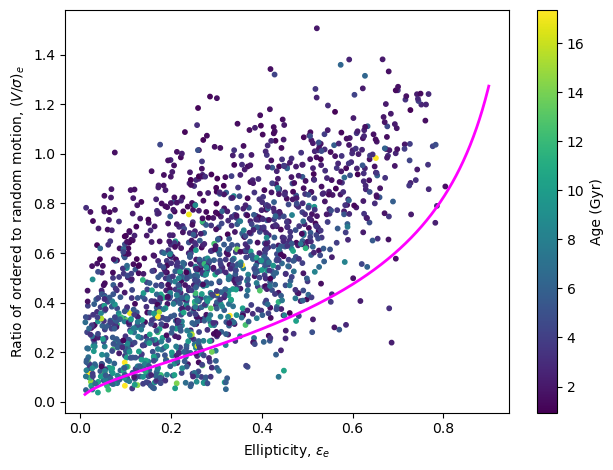

In [34]:
# Plot the theoretical line
plt.scatter(sami_ellipticity, sami_vsigma, s=10, c=sami_age)
plt.plot(ellipticity,vsigma, color='magenta', linewidth=2)
plt.xlabel('Ellipticity, $\\varepsilon_e$')
plt.ylabel('Ratio of ordered to random motion, $(V/\\sigma)_e$')
plt.colorbar(label='Age (Gyr)')           
plt.tight_layout()
plt.show()